Rawaa's Qs:

1.   How many close friends does a student have on average? → statistical model

2.  -What’s the relationship between body level and being bullied?
→ statistical model + graphical representation.
3.





In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from ipykernel import kernelapp as app

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
df=pd.read_csv('Bullying.csv', sep=r';') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [4]:
df.head(5)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,


In [5]:
df.shape

(56981, 18)

In [6]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [7]:
df.isnull().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

In [14]:
df['body_level']=[1]*df.shape[0]
df.loc[df[df['Were_underweight']=='Yes'].index,'body_level'] = 0
df.loc[df[df['Were_overweight']=='Yes'].index,'body_level'] = 2
df.loc[df[df['Were_obese']=='Yes'].index,'body_level'] = 3
df.loc[df[df['Were_obese'].isnull()].index,'body_level'] = np.nan

df['body_level']

0        NaN
1        NaN
2        1.0
3        1.0
4        NaN
        ... 
56976    2.0
56977    NaN
56978    NaN
56979    NaN
56980    1.0
Name: body_level, Length: 56981, dtype: float64

C:\Users\swak\AppData\Local\Temp\ipykernel_12004\2883410477.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)


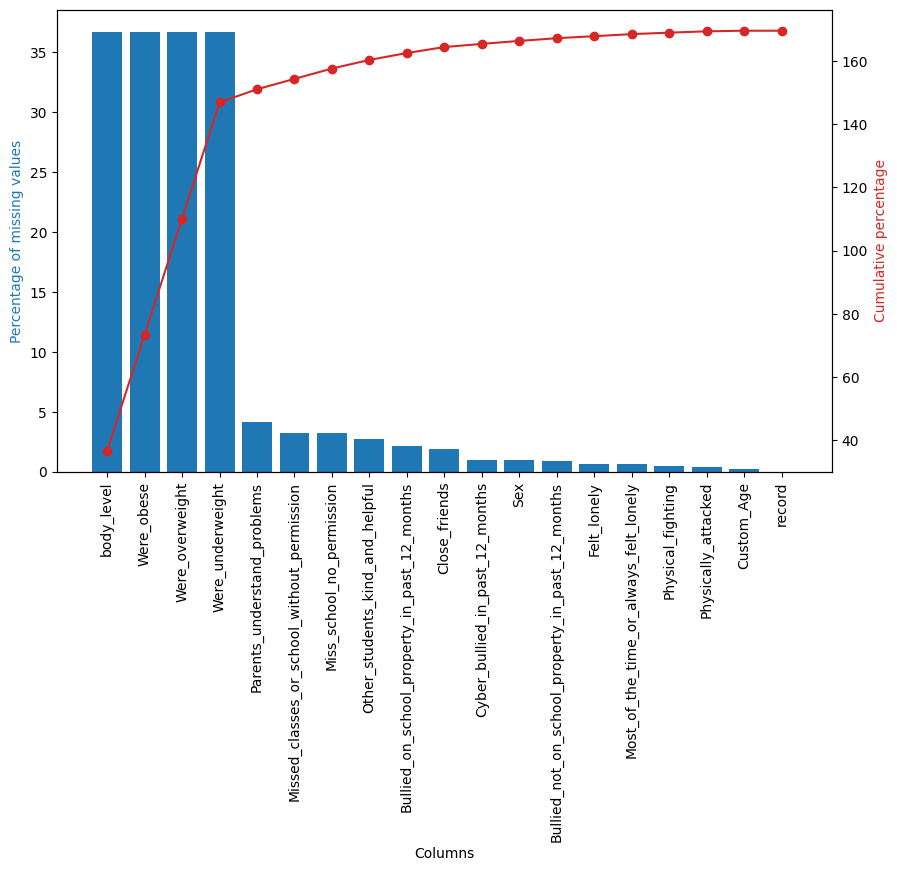

In [15]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100

# Sort the columns by percentage of missing values in descending order
missing_perc_sorted = missing_perc.sort_values(ascending=False)

# Calculate the cumulative percentage of missing values
cumulative_perc = missing_perc_sorted.cumsum()

# Create a Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(missing_perc_sorted.index, missing_perc_sorted.values, color='tab:blue')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Percentage of missing values', color='tab:blue')
ax1.set_xticklabels(missing_perc_sorted.index, rotation=90)

# Add a secondary y-axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(missing_perc_sorted.index, cumulative_perc.values, color='tab:red', marker='o')
ax2.set_ylabel('Cumulative percentage', color='tab:red')


# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
# print("Percent of missing values for each column is:")
# for col in df.columns:
#     percent_missing_value = (df[col].isnull().sum()/df.shape[0])
#     print(col, " : ", percent_missing_value)


In [ ]:
# df["body_level_missing"] = False
# df.loc[df[df['body_level'].isnull()].index, "body_level_missing"] = True

In [16]:
df.to_csv('processed_Bullying_v1.csv')

In [17]:
value_counts = df['body_level'].value_counts()

print(value_counts)

body_level
1.0    24644
2.0     8020
3.0     2655
0.0      733
Name: count, dtype: int64


In [ ]:
df.dropna(inplace=True)

value_counts = df['body_level'].value_counts()

print(value_counts)

1.0    22575
2.0     7323
3.0     2386
0.0      654
Name: body_level, dtype: int64


In [ ]:
df.drop(['Were_overweight','Were_underweight','Were_obese'],
  axis='columns', inplace=True)

In [ ]:
le = LabelEncoder()
df['Bullied_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_on_school_property_in_past_12_months'])
df['Bullied_not_on_school_property_in_past_12_months'] = le.fit_transform(df['Bullied_not_on_school_property_in_past_12_months'])
df['Cyber_bullied_in_past_12_months'] = le.fit_transform(df['Cyber_bullied_in_past_12_months'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Felt_lonely'] = le.fit_transform(df['Felt_lonely'])
df['Miss_school_no_permission'] = le.fit_transform(df['Miss_school_no_permission'])
df['Other_students_kind_and_helpful'] = le.fit_transform(df['Other_students_kind_and_helpful'])
df['Parents_understand_problems'] = le.fit_transform(df['Parents_understand_problems'])
df['Most_of_the_time_or_always_felt_lonely'] = le.fit_transform(df['Most_of_the_time_or_always_felt_lonely'])
df['Missed_classes_or_school_without_permission'] = le.fit_transform(df['Missed_classes_or_school_without_permission'])
df['Custom_Age'] = le.fit_transform(df['Custom_Age'])
df['Physically_attacked'] = le.fit_transform(df['Physically_attacked'])
df['Physical_fighting'] = le.fit_transform(df['Physical_fighting'])
df['Close_friends'] = le.fit_transform(df['Close_friends'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32938 entries, 2 to 56980
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   record                                            32938 non-null  int64  
 1   Bullied_on_school_property_in_past_12_months      32938 non-null  int64  
 2   Bullied_not_on_school_property_in_past_12_months  32938 non-null  int64  
 3   Cyber_bullied_in_past_12_months                   32938 non-null  int64  
 4   Custom_Age                                        32938 non-null  int64  
 5   Sex                                               32938 non-null  int64  
 6   Physically_attacked                               32938 non-null  int64  
 7   Physical_fighting                                 32938 non-null  int64  
 8   Felt_lonely                                       32938 non-null  int64  
 9   Close_friends    

In [ ]:
df.to_csv('/content/drive/MyDrive/processed_Bullying_v2.csv')